#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
%matplotlib inline
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


#### Reading data

In [2]:
permit_data = pd.read_csv("Construction_Permits_in_2020.csv")

In [3]:
permit_data.shape

(21506, 34)

#### Infomration about the dataset

In [4]:
permit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21506 entries, 0 to 21505
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   X                     21506 non-null  float64
 1   Y                     21506 non-null  float64
 2   OBJECTID              21506 non-null  int64  
 3   APPLICATIONDATE       21506 non-null  object 
 4   ISEXCAVATION          21506 non-null  object 
 5   ISFIXTURE             21506 non-null  object 
 6   ISPAVING              21506 non-null  object 
 7   ISLANDSCAPING         21506 non-null  object 
 8   ISPROJECTIONS         21506 non-null  object 
 9   ISPSRENTAL            21506 non-null  object 
 10  TRACKINGNUMBER        21506 non-null  int64  
 11  PERMITNUMBER          17639 non-null  object 
 12  INTAKEDATE            21506 non-null  object 
 13  ISSUEDATE             17639 non-null  object 
 14  EFFECTIVEDATE         21506 non-null  object 
 15  EXPIRATIONDATE     

In [5]:
permit_data['STATUS'].unique()

array(['Permit Expired', 'Cancel/Withdrawn', 'Denied',
       'Approved (Pending Payment)', 'Assigned', 'Revise and Resubmit',
       'Resubmitted', 'Reopened', 'Revoked', 'Pending Assignment',
       'Suspended', 'Issued'], dtype=object)

#### Replacing the values which fall under same category

In [6]:
permit_data['STATUS'].value_counts()

Permit Expired                17427
Cancel/Withdrawn               2974
Approved (Pending Payment)      410
Denied                          233
Revise and Resubmit             196
Issued                          196
Assigned                         33
Reopened                         11
Suspended                         9
Resubmitted                       8
Revoked                           6
Pending Assignment                3
Name: STATUS, dtype: int64

In [7]:
permit_data['STATUS'] = permit_data['STATUS'].replace(['Cancel/Withdrawn','Denied','Revise and Resubmit','Revoked','Pending Assignment','Suspended'],'Not Issued')

In [8]:
permit_data['STATUS'] = permit_data['STATUS'].replace(['Approved (Pending Payment)'],'Issued')

In [9]:
permit_data['STATUS'].count()

21506

In [10]:
status = permit_data['STATUS'].value_counts()
status

Permit Expired    17427
Not Issued         3421
Issued              606
Assigned             33
Reopened             11
Resubmitted           8
Name: STATUS, dtype: int64

#### Retrieving the values which are used for the target variable

In [11]:
permits = ['Permit Expired','Assigned' , 'Reopened' , 'Resubmitted']
permit_data = permit_data[permit_data.STATUS.isin(permits) == False]
permit_data['STATUS'].value_counts()

Not Issued    3421
Issued         606
Name: STATUS, dtype: int64

#### Plotting the target variables scores

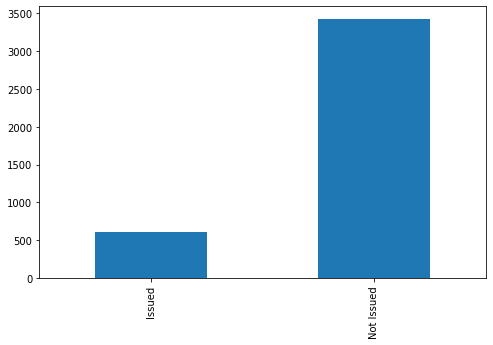

In [12]:
permit_data['STATUS'].value_counts().sort_values().plot(kind = 'bar',figsize =(8, 5))

#### Dropping the unwanted columns which are 100 percent null and nearer to 100 percent

In [13]:
permit_data.isnull().sum()*100/len(permit_data)

X                         0.000000
Y                         0.000000
OBJECTID                  0.000000
APPLICATIONDATE           0.000000
ISEXCAVATION              0.000000
ISFIXTURE                 0.000000
ISPAVING                  0.000000
ISLANDSCAPING             0.000000
ISPROJECTIONS             0.000000
ISPSRENTAL                0.000000
TRACKINGNUMBER            0.000000
PERMITNUMBER             94.909362
INTAKEDATE                0.000000
ISSUEDATE                94.909362
EFFECTIVEDATE             0.000000
EXPIRATIONDATE            0.000000
XCOORD                    0.000000
YCOORD                    0.000000
STATUS                    0.000000
WLFULLADDRESS             0.000000
PERMITTEENAME             8.641669
OWNERNAME                39.458654
CONTRACTORNAME           84.430097
WORKDETAIL                0.000000
READYFORREVIEWDATE       12.863174
APPLICANTCOMPANYNAME     32.604917
LATITUDE                  0.000000
LONGITUDE                 0.000000
GIS_ID              

In [14]:
permit_data.drop(['EDITED' , 'EDITOR' , 'CREATOR' , 'CREATED' ,
           'CONTRACTORNAME' , 'PERMITTEENAME' , 'OWNERNAME',
           'APPLICANTCOMPANYNAME' , 'GIS_ID','PERMITNUMBER' , 'ISSUEDATE' , 
           'READYFORREVIEWDATE','WLFULLADDRESS' , 'WORKDETAIL' , 'GLOBALID','OBJECTID',
           'APPLICATIONDATE', 'EXPIRATIONDATE' , 'EFFECTIVEDATE' , 'INTAKEDATE']  , axis = 1, inplace = True)

print('Shape after dropping columns and non imputable columns', permit_data.shape)

Shape after dropping columns and non imputable columns (4027, 14)


In [15]:
permit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4027 entries, 3 to 21505
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   X               4027 non-null   float64
 1   Y               4027 non-null   float64
 2   ISEXCAVATION    4027 non-null   object 
 3   ISFIXTURE       4027 non-null   object 
 4   ISPAVING        4027 non-null   object 
 5   ISLANDSCAPING   4027 non-null   object 
 6   ISPROJECTIONS   4027 non-null   object 
 7   ISPSRENTAL      4027 non-null   object 
 8   TRACKINGNUMBER  4027 non-null   int64  
 9   XCOORD          4027 non-null   float64
 10  YCOORD          4027 non-null   float64
 11  STATUS          4027 non-null   object 
 12  LATITUDE        4027 non-null   float64
 13  LONGITUDE       4027 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 471.9+ KB


#### Correlation between the columns

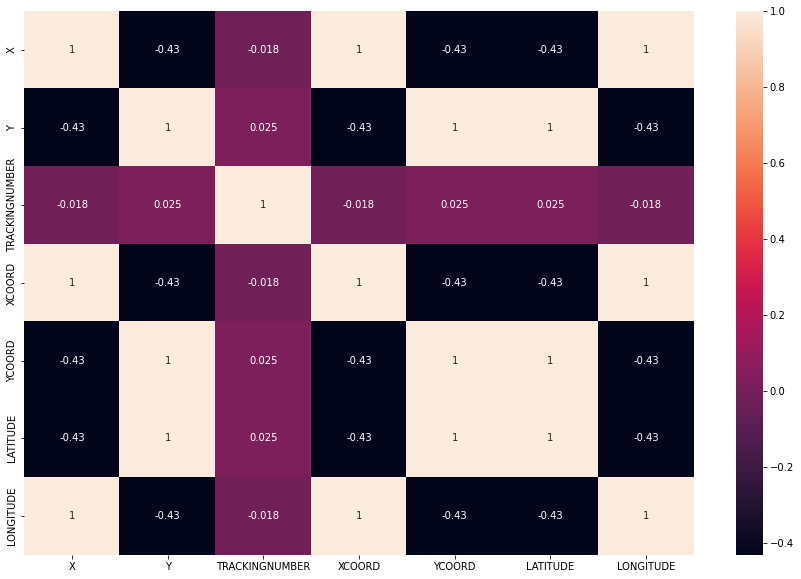

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(permit_data.corr(),annot=True)

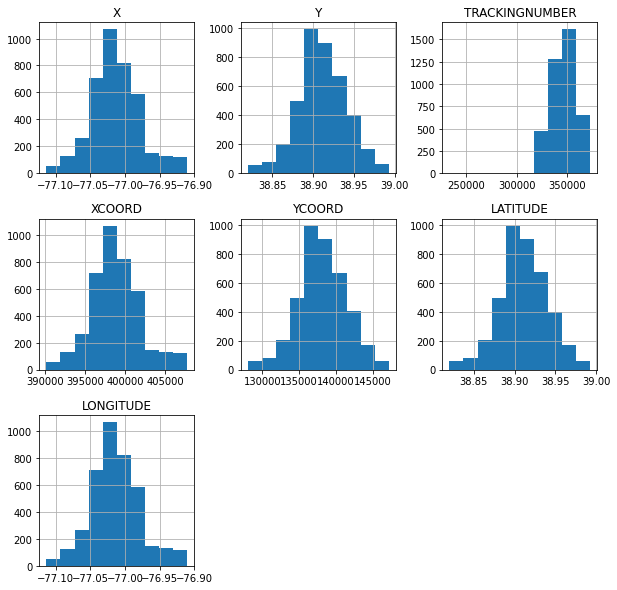

In [17]:
plt.rcParams["figure.figsize"] = (10,10)
permit_data.hist()
plt.show()

#### Checking whether the rows are out of bound and removing them.

In [18]:
print("x min:",permit_data['X'].min())
print("x max:",permit_data['X'].max())

print("\ny min:",permit_data['Y'].min())
print("y max:",permit_data['Y'].max())

x min: -77.1133913239597
x max: -76.9101400706397

y min: 38.8202261093127
y max: 38.9927701836053


In [19]:
xmin = -77.1133913239597
ymin = 38.8202261093127
xmax = -76.9101400706397
ymax = 38.9927701836053

print('Current rows:', permit_data.shape[0])
permit_data = permit_data[(((permit_data.LATITUDE >= -77.1133913239597) & (permit_data.LONGITUDE <= 38.8202261093127)) | 
            ((permit_data.LONGITUDE <= -76.9101400706397) & (permit_data.LONGITUDE >= 38.9927701836053)))]
print('Rows after removing out of box points:', permit_data.shape[0])

Current rows: 4027
Rows after removing out of box points: 4027


#### Mapping the Target variable

In [20]:
import folium                           
from folium import plugins              

folium_map = folium.Map(location = [38.9,  -77], zoom_start=12.5, tiles="cartodbpositron")
for index,row in permit_data.iterrows():  
    folium.CircleMarker(location=(row['LATITUDE'], row['LONGITUDE']), color='#f79605'if row["STATUS"]=="Not Issued" else "#cb80ed", 
                        radius=5, weight= (0.5) , fill=True).add_child(folium.Popup(row['STATUS'])).add_to(folium_map)
folium_map

#### Diving the aattributes to numerical and categorical columns

In [21]:
numbers=['X', 'Y', 'TRACKINGNUMBER' , 'XCOORD', 'YCOORD',
        'LATITUDE', 'LONGITUDE']
categories=['ISEXCAVATION', 'ISFIXTURE', 'ISPAVING',
       'ISLANDSCAPING', 'ISPROJECTIONS', 'ISPSRENTAL',]

#### Splitting the data to train and test 

In [22]:
from sklearn.model_selection import train_test_split
X = permit_data[[x for x in permit_data.columns if x != 'STATUS']]
y = permit_data['STATUS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

print(f'Training examples: {X_train.shape[0]}')
print(f'Test examples: {X_test.shape[0]}')
print('\nFeature names:')
print(*X.columns, sep='\t')

Training examples: 2416
Test examples: 1611

Feature names:
X	Y	ISEXCAVATION	ISFIXTURE	ISPAVING	ISLANDSCAPING	ISPROJECTIONS	ISPSRENTAL	TRACKINGNUMBER	XCOORD	YCOORD	LATITUDE	LONGITUDE


In [23]:
permit_data.head(5)

X          Y ISEXCAVATION ISFIXTURE ISPAVING ISLANDSCAPING  \
3 -77.043455  38.904708            F         T        F             F   
4 -76.998446  38.904071            F         T        F             F   
5 -77.007494  38.907246            F         T        F             F   
6 -77.025991  38.914462            F         T        F             F   
7 -77.033250  38.915579            F         T        F             F   

  ISPROJECTIONS ISPSRENTAL  TRACKINGNUMBER     XCOORD     YCOORD      STATUS  \
3             F          F          330462  396230.99  137427.94  Not Issued   
4             F          F          330463  400134.98  137356.32  Not Issued   
5             F          F          330471  399350.19  137708.83  Not Issued   
6             F          F          330485  397746.09  138510.18  Not Issued   
7             F          F          330488  397116.56  138634.40  Not Issued   

    LATITUDE  LONGITUDE  
3  38.904700 -77.043453  
4  38.904063 -76.998444  
5  38.907238 -77.007492  
6  38.914454 -77.025989  
7  38.915572 -77.033248

#### Creating pipelines for the numerical and categorical.
#### Converting the pipelines to a processing pipeline

In [24]:
from sklearn.pipeline import Pipeline
numerical_pipeline = Pipeline([('impute_missing', SimpleImputer(strategy='median')),
                           ('standardize_num', StandardScaler())])

categorical_pipeline = Pipeline([('impute_missing_cats', SimpleImputer( strategy='most_frequent')),
                          ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore',  drop='first'))])

processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', numerical_pipeline, numbers),
                                                      ('create_dummies', categorical_pipeline, categories)
                                                      ])

In [25]:
c_transform = categorical_pipeline.fit_transform(np.array(X_train[categories]))
c_transform.toarray().shape

(2416, 6)

## Performing the models on the pipelines

### Logistic model

#### **First iteration**

In [26]:
pipelineLR = Pipeline([('data_processing', processing_pipeline),
                       ('model', LogisticRegression(max_iter=1000))])

parameters = [{'model__C': [0.1,1,10,100],'model__penalty':['l2']},{'model__C': [0.1,1,10,100],'model__penalty':['l1']},{'model__penalty':['none']}]

Log_reg_gs_search = GridSearchCV(pipelineLR, param_grid=parameters, scoring='f1_weighted', cv=10,refit=True)
Log_reg_gs_search = Log_reg_gs_search.fit(X_train, y_train)
print(f'Train set score: {Log_reg_gs_search.score(X_train,y_train):.2%}')
print(f'Test set score: {Log_reg_gs_search.score(X_test,y_test):.2%}')


Train set score: 79.50%
Test set score: 77.40%


#### *Classification report*

In [27]:
Log_reg_y_testp = Log_reg_gs_search.best_estimator_.predict(X_test)

print(classification_report(y_test, Log_reg_y_testp))

              precision    recall  f1-score   support

      Issued       0.38      0.03      0.06       258
  Not Issued       0.84      0.99      0.91      1353

    accuracy                           0.84      1611
   macro avg       0.61      0.51      0.48      1611
weighted avg       0.77      0.84      0.77      1611



#### *Best parameter for the above models in logistic regression*




In [28]:
Log_reg_gs_search.best_params_

{'model__C': 1, 'model__penalty': 'l2'}

#### *Confusion matrix*

In [29]:
y_testpr_rf = Log_reg_gs_search.predict(X_test)
print(confusion_matrix(y_test, y_testpr_rf))

[[   8  250]
 [  13 1340]]


#### **Second iteration**


In [30]:
pipelineLR = Pipeline([('data_processing', processing_pipeline),
                       ('model', LogisticRegression(max_iter=1000))])

parameters = [{'model__C': [1,20,100,200],'model__penalty':['l1']},{'model__C': [1,20,100,200],'model__penalty':['l2']},{'model__penalty':['none']}]

Log_reg_gs_searchh = GridSearchCV(pipelineLR, param_grid=parameters, scoring='f1_weighted', cv=20,refit=True)
Log_reg_gs_searchh = Log_reg_gs_searchh.fit(X_train, y_train)
print(f'Train set score: {Log_reg_gs_searchh.score(X_train,y_train):.2%}')
print(f'Test set score: {Log_reg_gs_searchh.score(X_test,y_test):.2%}')


Train set score: 79.43%
Test set score: 77.54%


#### *Classification report*

In [31]:
Log_reg_y_testpp = Log_reg_gs_searchh.best_estimator_.predict(X_test)
print(classification_report(y_test, Log_reg_y_testpp))

              precision    recall  f1-score   support

      Issued       0.41      0.03      0.06       258
  Not Issued       0.84      0.99      0.91      1353

    accuracy                           0.84      1611
   macro avg       0.63      0.51      0.49      1611
weighted avg       0.77      0.84      0.78      1611



#### *Best parameter for the above models in logistic regression*


In [32]:
Log_reg_gs_searchh.best_params_

{'model__C': 20, 'model__penalty': 'l2'}

#### *Confusion matrix*

In [59]:
y_testpr_rf = Log_reg_gs_searchh.predict(X_test)
print(confusion_matrix(y_test, y_testpr_rf))

[[   9  249]
 [  13 1340]]


### Decision Tree

#### **First Iteration**

In [34]:
pipelineDT = Pipeline([('data_processing', processing_pipeline),
                       ('modeldt', DecisionTreeClassifier())])
params = {
    'modeldt__max_depth': [2, 3, 8, 10, 20],
    'modeldt__min_samples_leaf': [5,15, 25, 50, 100],
    'modeldt__criterion': ["gini", "entropy"]
}
tree_gs_search = GridSearchCV(estimator=pipelineDT, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "f1_weighted")
tree_gs_search=tree_gs_search.fit(X_train, y_train)
print(f'Train set score: {tree_gs_search.score(X_train,y_train):.2%}')
print(f'Test set score: {tree_gs_search.score(X_test,y_test):.2%}')

Fitting 4 folds for each of 50 candidates, totalling 200 fits
Train set score: 87.62%
Test set score: 84.46%


#### *Classification report*

In [35]:
tree_y_testp = tree_gs_search.predict(X_test)
print(classification_report(y_test, tree_y_testp))

              precision    recall  f1-score   support

      Issued       0.60      0.36      0.45       258
  Not Issued       0.89      0.95      0.92      1353

    accuracy                           0.86      1611
   macro avg       0.75      0.66      0.69      1611
weighted avg       0.84      0.86      0.84      1611



#### *Best parameter for the above models in desicion tree regression*


In [36]:
tree_gs_search.best_params_

{'modeldt__criterion': 'entropy',
 'modeldt__max_depth': 3,
 'modeldt__min_samples_leaf': 5}

#### *Confusion matrix*

In [37]:
y_testpr_rf = tree_gs_search.predict(X_test)
print(confusion_matrix(y_test, y_testpr_rf))

[[  93  165]
 [  61 1292]]


#### **Second iteration**

In [38]:
pipelineDT = Pipeline([('data_processing', processing_pipeline),
                       ('modeldt', DecisionTreeClassifier())])
params = {
    'modeldt__max_depth': [25,30,35,40,45],
    'modeldt__min_samples_leaf': [10,25,40,90,150],
    'modeldt__criterion': ["gini", "entropy"]
}
tree_gs_searchh = GridSearchCV(estimator=pipelineDT, 
                           param_grid=params, 
                           cv=8, n_jobs=-1, verbose=1, scoring = "f1_weighted")
tree_gs_searchh=tree_gs_searchh.fit(X_train, y_train)
print(f'Train set score: {tree_gs_searchh.score(X_train,y_train):.2%}')
print(f'Test set score: {tree_gs_searchh.score(X_test,y_test):.2%}')

Fitting 8 folds for each of 50 candidates, totalling 400 fits
Train set score: 86.57%
Test set score: 83.76%


#### *Classification report*

In [39]:
tree_y_testp = tree_gs_searchh.predict(X_test)
print(classification_report(y_test, tree_y_testp))

              precision    recall  f1-score   support

      Issued       0.65      0.29      0.40       258
  Not Issued       0.88      0.97      0.92      1353

    accuracy                           0.86      1611
   macro avg       0.76      0.63      0.66      1611
weighted avg       0.84      0.86      0.84      1611



#### *Best parameter for the above models in decision tree regression*


In [40]:
tree_gs_searchh.best_params_

{'modeldt__criterion': 'gini',
 'modeldt__max_depth': 25,
 'modeldt__min_samples_leaf': 40}

#### *Confusion matrix*

In [41]:
y_testpr_rf = tree_gs_searchh.predict(X_test)
print(confusion_matrix(y_test, y_testpr_rf))

[[  74  184]
 [  40 1313]]


### SVC

#### **First Iteration**

In [42]:
pipelinesvc = Pipeline([('data_processing', processing_pipeline),
               ('svc', SVC(probability=True))])
params_svc = {
    'svc__kernel': ['linear', 'poly', 'rbf']}

svc_gs_search = GridSearchCV(estimator=pipelinesvc, 
                           param_grid=params_svc, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "f1_weighted")
svc_gs_search=svc_gs_search.fit(X_train, y_train)
print(f'Train set score: {svc_gs_search.score(X_train,y_train):.2%}')
print(f'Test set score: {svc_gs_search.score(X_test,y_test):.2%}')

Fitting 4 folds for each of 3 candidates, totalling 12 fits
Train set score: 85.89%
Test set score: 83.08%


#### *Classification report*

In [43]:
svc_y_testp = svc_gs_search.best_estimator_.predict(X_test)
print(classification_report(y_test, svc_y_testp))

              precision    recall  f1-score   support

      Issued       0.71      0.23      0.35       258
  Not Issued       0.87      0.98      0.92      1353

    accuracy                           0.86      1611
   macro avg       0.79      0.61      0.64      1611
weighted avg       0.84      0.86      0.83      1611



#### *Best parameter for the above models in svc regression*


In [44]:
svc_gs_search.best_params_

{'svc__kernel': 'rbf'}

#### *Confusion matrix*

In [45]:
y_testpr_rf = svc_gs_search.predict(X_test)
print(confusion_matrix(y_test, y_testpr_rf))

[[  60  198]
 [  25 1328]]


### **Second iteration**

In [46]:
pipelinesvc = Pipeline([('data_processing', processing_pipeline),
               ('svc', SVC(probability=True))])
params_svc = {
    'svc__kernel': [ 'sigmoid', 'precomputed']}

svc_gs_searchh = GridSearchCV(estimator=pipelinesvc, 
                           param_grid=params_svc, 
                           cv=10, n_jobs=-1, verbose=1, scoring = "f1_weighted")
svc_gs_searchh=svc_gs_searchh.fit(X_train, y_train)
print(f'Train set score: {svc_gs_searchh.score(X_train,y_train):.2%}')
print(f'Test set score: {svc_gs_searchh.score(X_test,y_test):.2%}')

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Train set score: 77.12%
Test set score: 75.55%


#### *Classification report*


In [47]:
svc_y_testp = svc_gs_searchh.best_estimator_.predict(X_test)
print(classification_report(y_test, svc_y_testp))

              precision    recall  f1-score   support

      Issued       0.22      0.19      0.20       258
  Not Issued       0.85      0.87      0.86      1353

    accuracy                           0.76      1611
   macro avg       0.54      0.53      0.53      1611
weighted avg       0.75      0.76      0.76      1611



#### *Best parameter for the above models in svc regression*


In [48]:
svc_gs_searchh.best_params_

{'svc__kernel': 'sigmoid'}

#### *Confusion matrix*

In [49]:
y_testpr_rf = svc_gs_searchh.predict(X_test)
print(confusion_matrix(y_test, y_testpr_rf))

[[  49  209]
 [ 173 1180]]


## Neural networks

#### **First Iteration**

In [50]:
from sklearn.neural_network import MLPClassifier
import datetime

st = datetime.datetime.now()
mlp = MLPClassifier(hidden_layer_sizes=(8,6,1), max_iter=100,activation = 'tanh',solver='adam',random_state=123)
pipemlp = Pipeline([('data_processing', processing_pipeline),('mlp',mlp)])

pipemlp = pipemlp.fit(X_train, y_train)
en = datetime.datetime.now()

print(f'Train set score: {pipemlp.score(X_train, y_train):.2%}')
print(f'Test score: {pipemlp.score(X_test, y_test):.2%}')
print(f'\nTraining completed in {en-st}')

Train set score: 86.92%
Test score: 84.67%

Training completed in 0:00:01.076016


#### *Classification report*

In [51]:
NN_y_testp = pipemlp.predict(X_test)
print(classification_report(y_test, NN_y_testp))

              precision    recall  f1-score   support

      Issued       0.63      0.10      0.17       258
  Not Issued       0.85      0.99      0.92      1353

    accuracy                           0.85      1611
   macro avg       0.74      0.54      0.54      1611
weighted avg       0.82      0.85      0.80      1611



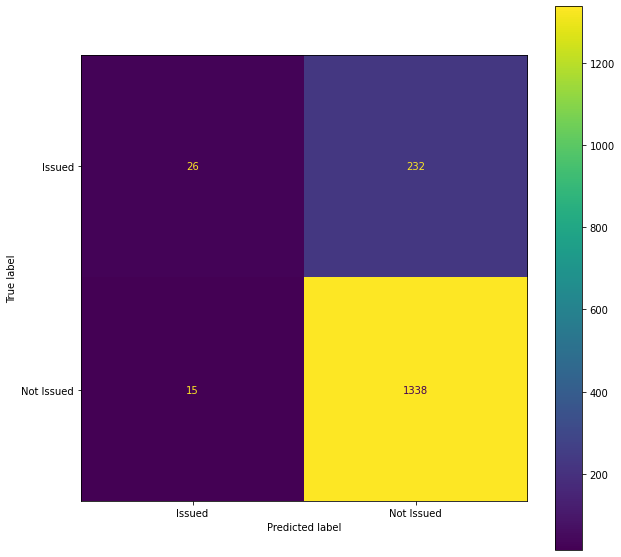

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(pipemlp, X_test, y_test)
plt.show()

#### **Second iteration**

In [53]:
st = datetime.datetime.now()
mlpp = MLPClassifier(hidden_layer_sizes=(10,16,24), max_iter=100,activation = 'tanh',solver='adam',random_state=123)
pipemlpp = Pipeline([('data_processing', processing_pipeline),('mlp',mlpp)])

pipemlpp = pipemlpp.fit(X_train, y_train)
en = datetime.datetime.now()

print(f'Train set score: {pipemlpp.score(X_train, y_train):.2%}')
print(f'Test score: {pipemlpp.score(X_test, y_test):.2%}')
print(f'\nTraining completed in {en-st}')

Train set score: 88.87%
Test score: 86.16%

Training completed in 0:00:01.463361


#### *Classification report*

In [54]:
NN_y_testp = pipemlpp.predict(X_test)
print(classification_report(y_test, NN_y_testp))

              precision    recall  f1-score   support

      Issued       0.64      0.31      0.42       258
  Not Issued       0.88      0.97      0.92      1353

    accuracy                           0.86      1611
   macro avg       0.76      0.64      0.67      1611
weighted avg       0.84      0.86      0.84      1611



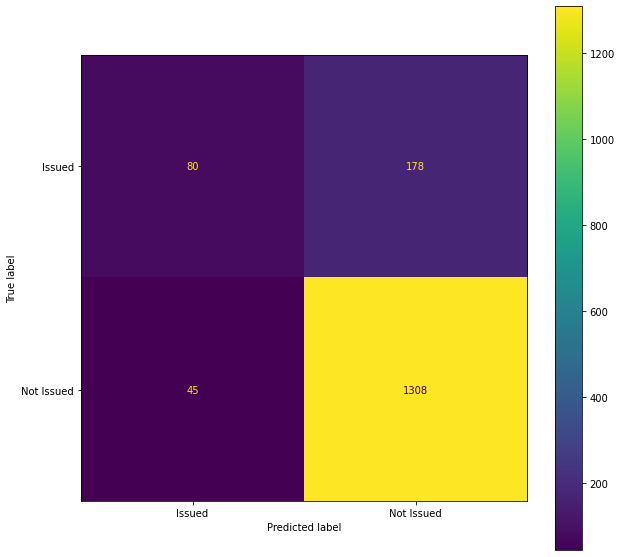

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(pipemlpp, X_test, y_test)
plt.show()

### Comparing the models values 

In [56]:
print("Logistic Regression score:"+str(Log_reg_gs_search.score(X_test, y_test)))
print("Logistic Regression score with different paramas:"+str(Log_reg_gs_searchh.score(X_test, y_test)))
print("\nDecision Tree score:"+str(tree_gs_search.score(X_test, y_test)))
print("Decision Tree score with different depths:"+str(tree_gs_searchh.score(X_test, y_test)))
print("\nSupport Vector Classifier score:"+str(svc_gs_search.score(X_test,y_test)))
print("Support Vector Classifier score with different kernels:"+str(svc_gs_searchh.score(X_test,y_test)))
print("\nNeural Network score:"+str(pipemlp.score(X_test,y_test)))
print("Neural Network score with different hidden layers:"+str(pipemlpp.score(X_test,y_test)))

Logistic Regression score:0.7739822491049122
Logistic Regression score with different paramas:0.7753533283093608

Decision Tree score:0.844604552800145
Decision Tree score with different depths:0.837556864468494

Support Vector Classifier score:0.8308271012657477
Support Vector Classifier score with different kernels:0.7555447912124929

Neural Network score:0.8466790813159528
Neural Network score with different hidden layers:0.861576660459342


#### From the above scores for the models with different parameters we can observe that the Neural Network has given the best performance, then we have decision tree and support vector classifier models which have given good scores after neural networks. As we can see from the scores the first iteration for the first three models has given best from the second iteration.   

## Representing the best models with roc curve

### Roc curve for train data

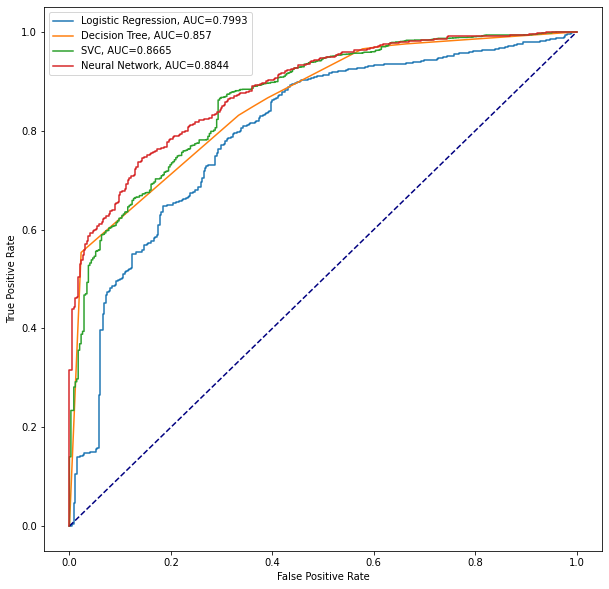

In [57]:
plt.figure(0).clf()

#fit logistic regression model and plot ROC curve
model = Log_reg_gs_searchh
#model.fit(X_train, y_train)
y_pred = model.predict_proba(X_train)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_train, y_pred,pos_label='Not Issued')
auc = round(metrics.roc_auc_score(y_train, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

model = tree_gs_search
y_pred = model.predict_proba(X_train)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_train, y_pred,pos_label='Not Issued')
auc = round(metrics.roc_auc_score(y_train, y_pred), 4)
plt.plot(fpr,tpr,label="Decision Tree, AUC="+str(auc))

model = svc_gs_search
y_pred = model.predict_proba(X_train)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_train, y_pred,pos_label='Not Issued')
auc = round(metrics.roc_auc_score(y_train, y_pred), 4)
plt.plot(fpr,tpr,label="SVC, AUC="+str(auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

model = pipemlpp
y_pred = model.predict_proba(X_train)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_train, y_pred,pos_label='Not Issued')
auc = round(metrics.roc_auc_score(y_train, y_pred), 4)
plt.plot(fpr,tpr,label="Neural Network, AUC="+str(auc))

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

#add legend
plt.legend()

### Roc curve for test data

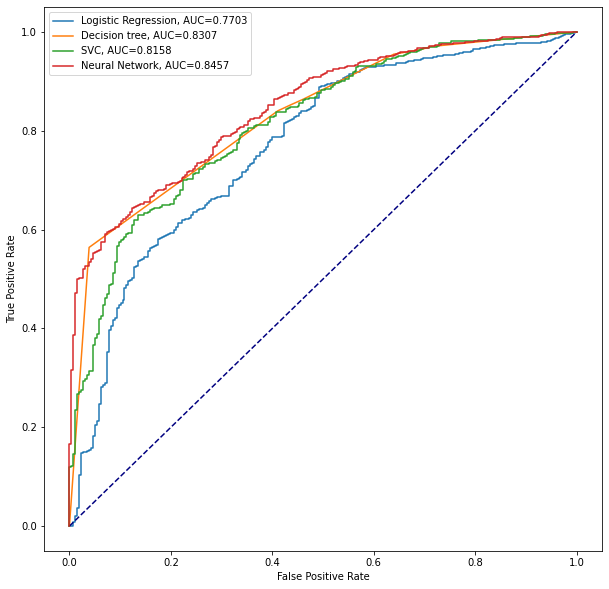

In [58]:
from sklearn import metrics
plt.figure(0).clf()

#fit logistic regression model and plot ROC curve
model = Log_reg_gs_searchh
#model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred,pos_label='Not Issued')
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

model = tree_gs_search
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred,pos_label='Not Issued')
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Decision tree, AUC="+str(auc))

model = svc_gs_search
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred,pos_label='Not Issued')
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="SVC, AUC="+str(auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

model = pipemlpp
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred,pos_label='Not Issued')
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Neural Network, AUC="+str(auc))

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

#add legend
plt.legend()

##### From the above ROC curves and roc accuracy scores for differet models we can understand that the Neural network regression has the best score and performes better than other models.

#### To improve the models performance we can implement other hyperparameters and observe any changes with the regular parameters from the data and the hyperparameters. To get to know more about the models performances we can use more size of the data and can compare to the scores for the models. Learning more baout the features can help us to get more accurate and better model performaces using feature processing. 

### References
 https://www.statology.org/plot-multiple-roc-curves-python/

https://medium.com/datasciencearth/map-visualization-with-folium-d1403771717